<a href="https://colab.research.google.com/github/Srilekhareddy01/Rainfall-prediction/blob/main/New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the packages and modules required for running the code successfully

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.kernel_approximation import RBFSampler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense
import seaborn as sns
from sklearn.pipeline import make_pipeline
import tensorflow as tf


# Importing the data into data variable and extracting input data and output data separately

In [9]:
data = pd.read_csv(r"/content/austin_final.csv")
X = data.drop(['PrecipitationSumInches'], axis=1)
print(data.head())
y = data['PrecipitationSumInches']
y = y.values.reshape(-1, 1)
day_index = 798
days = [i for i in range(y.size)]


   Unnamed: 0  TempHighF  TempAvgF  TempLowF  DewPointHighF  DewPointAvgF  \
0           0         74        60        45           67.0          49.0   
1           1         56        48        39           43.0          36.0   
2           2         58        45        32           31.0          27.0   
3           3         61        46        31           36.0          28.0   
4           4         58        50        41           44.0          40.0   

   DewPointLowF  HumidityHighPercent  HumidityAvgPercent  HumidityLowPercent  \
0          43.0                 93.0                75.0                57.0   
1          28.0                 93.0                68.0                43.0   
2          23.0                 76.0                52.0                27.0   
3          21.0                 89.0                56.0                22.0   
4          36.0                 86.0                71.0                56.0   

   SeaLevelPressureAvgInches  VisibilityHighMiles  Visib

# Splitting the dataset into training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1, -1)

# Scaling the data

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-7-e0ee75a2d34a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error:0.08082251291666667
Root Mean Squared Error: 0.2842930053952553
The precipitation in inches for the input is: [0.7638]
The precipitation trend graph: 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


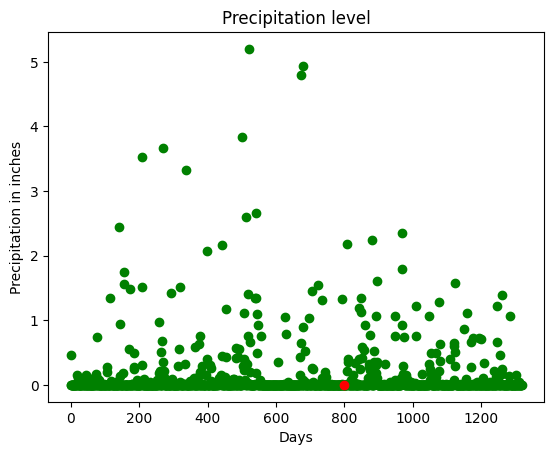

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error: {rmse}')
print('The precipitation in inches for the input is:', model.predict(inp))

print('The precipitation trend graph: ')
plt.scatter(days, y, color='g')
plt.scatter(days[day_index], y[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

# Plot a graph of precipitation levels vs n# of days
plt.show()

In [17]:
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
print('The precipitation in inches for the input is:', model.predict(inp))


Root Mean Squared Error: 0.257784728353874
The precipitation in inches for the input is: [0.13298559]


In [20]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'SVR RMSE: {rmse}')
print('The precipitation in inches for the input is:', model.predict(inp))

SVR RMSE: 0.33537117549682693
The precipitation in inches for the input is: [0.07861242]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [22]:
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Neural Network RMSE: {rmse}')
print('The precipitation in inches for the input is:', model.predict(inp))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network RMSE: 0.6516059456588578
The precipitation in inches for the input is: [1.65360953]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
